In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset (assuming it's in a CSV file named 'smartgrid.csv')
df = pd.read_csv('Datasets/smart_grid_stability_augmented.csv')

# Convert the last column ('stabf') to numeric values: stable=1, unstable=0
df['stabf'] = df['stabf'].map({'stable': 1, 'unstable': 0})

# Define features (X) and target (y)
X = df.drop(['stabf'], axis=1)
y = df['stabf']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# SVM Model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True)

In [26]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy for both models
svm_accuracy = accuracy_score(y_test, y_pred_svm)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

SVM Accuracy: 0.9928
Random Forest Accuracy: 1.0000


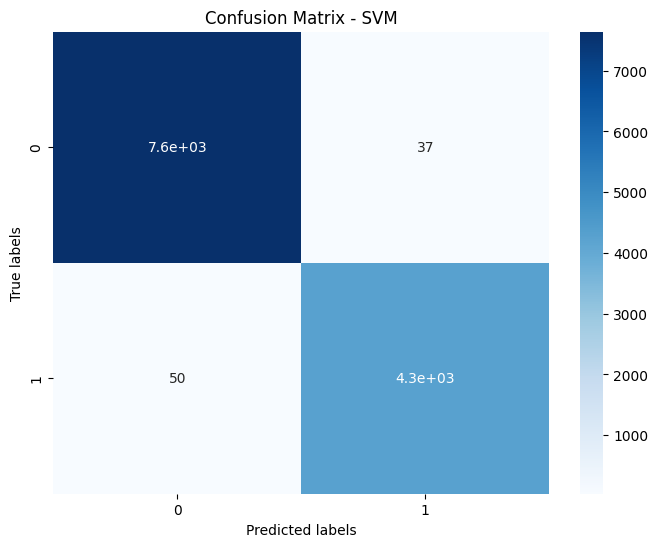

In [28]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

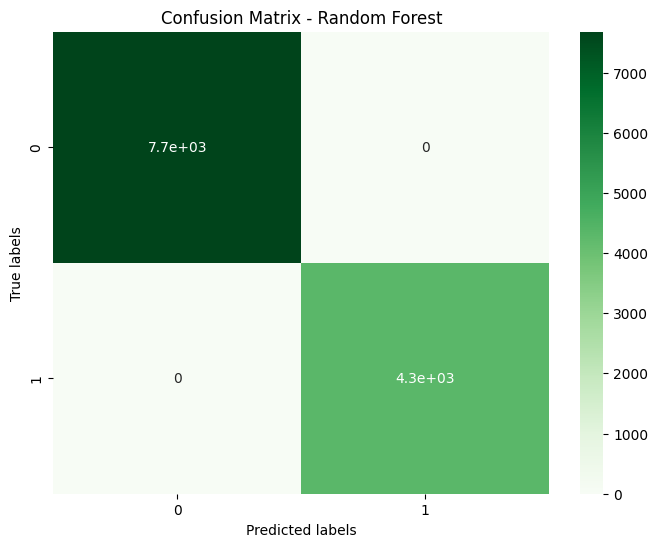

In [29]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [30]:
# ROC Curves
y_pred_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
auc_rf = auc(fpr_rf, tpr_rf)

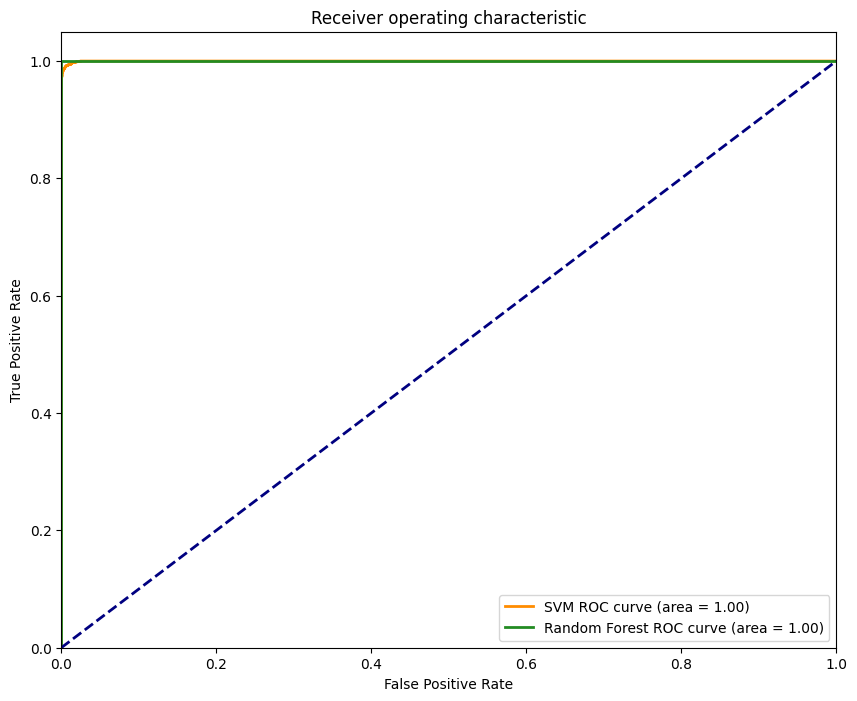

In [31]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='forestgreen', lw=2, label=f'Random Forest ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
print(f"SVM AUC: {auc_svm:.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")
print("===============================================")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("===============================================")
# Print classification report for both models
from sklearn.metrics import classification_report

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

SVM AUC: 0.9998
Random Forest AUC: 1.0000
SVM Accuracy: 0.9928
Random Forest Accuracy: 1.0000
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7678
           1       0.99      0.99      0.99      4322

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7678
           1       1.00      1.00      1.00      4322

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

